Saving SMI-NEWS-plastics-8.png to SMI-NEWS-plastics-8.png


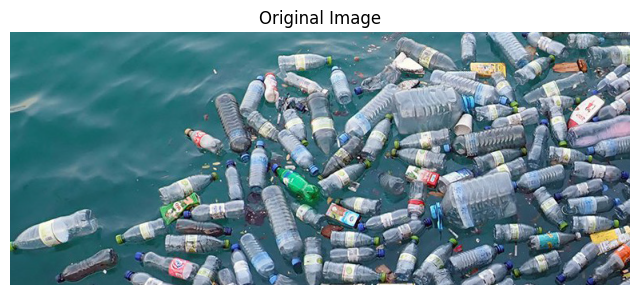

Enter HSV factors (h, s, v) as decimals (e.g., 1.1, 0.8, 1.2):
1.5 1.5 1.5
Enter translation factor (e.g., 0.2):
0.3
Enter scale factor (e.g., 0.9):
1.5


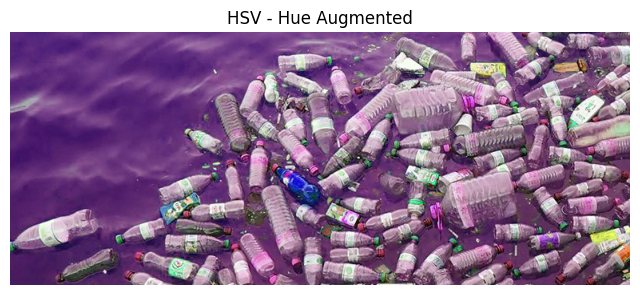

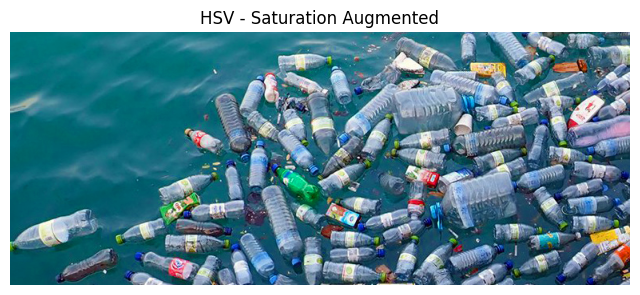

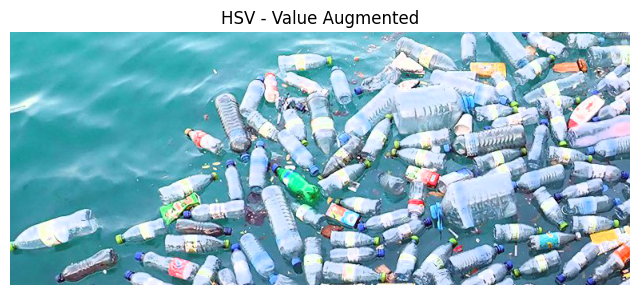

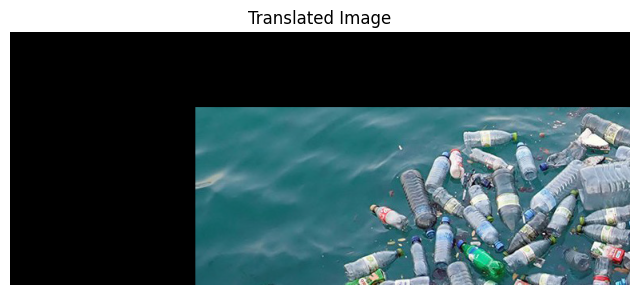

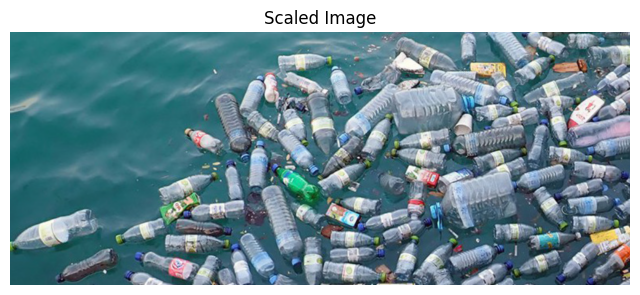

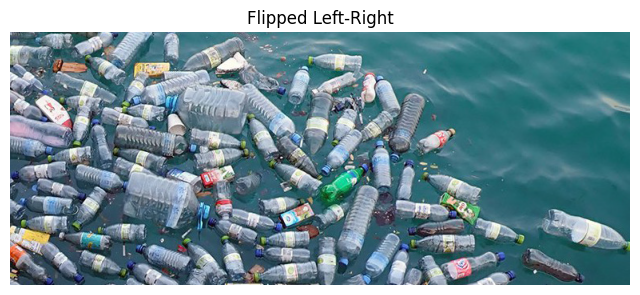

Upload 3 additional images for mosaic augmentation:


Saving CodeChefBadge.png to CodeChefBadge.png


Saving OCDMF2023.png to OCDMF2023.png


Saving Data Analyiss By Microsoft & Linkedin.png to Data Analyiss By Microsoft & Linkedin.png


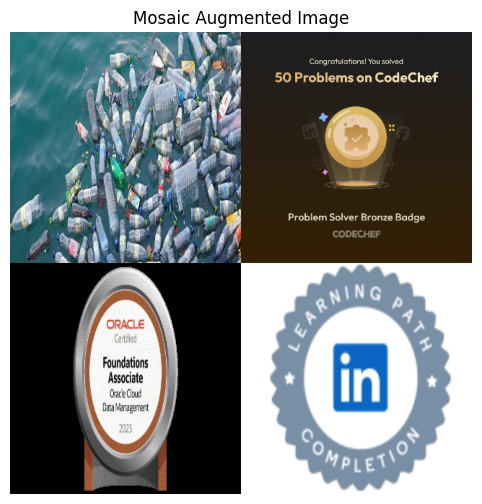

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display a single image
def display_image(image, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

# Function to apply and display HSV augmentations separately
def augment_and_display_hsv(image, h_factor, s_factor, v_factor):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV).astype(np.float32)

    # Apply Hue augmentation
    hsv_hue = hsv_image.copy()
    hsv_hue[..., 0] *= h_factor
    hsv_hue = np.clip(hsv_hue, 0, 255).astype(np.uint8)
    hsv_hue = cv2.cvtColor(hsv_hue, cv2.COLOR_HSV2BGR)
    display_image(hsv_hue, "HSV - Hue Augmented")

    # Apply Saturation augmentation
    hsv_sat = hsv_image.copy()
    hsv_sat[..., 1] *= s_factor
    hsv_sat = np.clip(hsv_sat, 0, 255).astype(np.uint8)
    hsv_sat = cv2.cvtColor(hsv_sat, cv2.COLOR_HSV2BGR)
    display_image(hsv_sat, "HSV - Saturation Augmented")

    # Apply Value augmentation
    hsv_val = hsv_image.copy()
    hsv_val[..., 2] *= v_factor
    hsv_val = np.clip(hsv_val, 0, 255).astype(np.uint8)
    hsv_val = cv2.cvtColor(hsv_val, cv2.COLOR_HSV2BGR)
    display_image(hsv_val, "HSV - Value Augmented")

# Function to apply and display translation augmentation
def translate_and_display(image, translate_factor):
    h, w = image.shape[:2]
    tx = int(w * translate_factor)
    ty = int(h * translate_factor)
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (w, h))
    display_image(translated_image, "Translated Image")

# Function to apply and display scaling augmentation
def scale_and_display(image, scale_factor):
    h, w = image.shape[:2]
    scaled_image = cv2.resize(image, (int(w * scale_factor), int(h * scale_factor)))
    display_image(scaled_image, "Scaled Image")

# Function to apply and display flipping augmentation
def flip_and_display(image):
    flipped_image = cv2.flip(image, 1)
    display_image(flipped_image, "Flipped Left-Right")

# Function to apply and display mosaic augmentation
def mosaic_and_display(images, size=(640, 640)):
    h, w = size
    mosaic = np.zeros((h, w, 3), dtype=np.uint8)
    positions = [(0, 0), (0, w // 2), (h // 2, 0), (h // 2, w // 2)]
    for img, (x, y) in zip(images, positions):
        img = cv2.resize(img, (w // 2, h // 2))
        mosaic[x:x + img.shape[0], y:y + img.shape[1]] = img
    display_image(mosaic, "Mosaic Augmented Image")

# Main execution
if __name__ == "__main__":
    # Upload an image
    from google.colab import files
    uploaded = files.upload()

    for filename in uploaded.keys():
        # Read and display the original image
        image = cv2.imread(filename)
        display_image(image, "Original Image")

        # Get user input for augmentations
        print("Enter HSV factors (h, s, v) as decimals (e.g., 1.1, 0.8, 1.2):")
        h_factor, s_factor, v_factor = map(float, input().split())
        print("Enter translation factor (e.g., 0.2):")
        translate_factor = float(input())
        print("Enter scale factor (e.g., 0.9):")
        scale_factor = float(input())

        # Apply and display augmentations step by step
        augment_and_display_hsv(image, h_factor, s_factor, v_factor)
        translate_and_display(image, translate_factor)
        scale_and_display(image, scale_factor)
        flip_and_display(image)

        # Mosaic augmentation
        print("Upload 3 additional images for mosaic augmentation:")
        additional_images = []
        for _ in range(3):
            uploaded_additional = files.upload()
            for fname in uploaded_additional.keys():
                additional_images.append(cv2.imread(fname))
        mosaic_and_display([image] + additional_images)
